## Q-Learning agent

In [1]:
from agent import Agent
from hanoi import Hanoi, Action
import matplotlib.pyplot as plt
import numpy as np

### Q-Learning update rule:
$$
Q[s, a] := (1 - \alpha) * Q[s, a] + \alpha * (r + \gamma * max_{a' \in actions} Q[s', a'])
$$

In [2]:
def plot_Q_evolution(game, agent, it_list, path=None):
  plt.figure(dpi=150)
  nb_optimal_moves = 2**N-1
  nb_moves = []
  for it in it_list:
    tmp = []
    for _ in range(5):
      policy = agent.Q_fit(nb_iterations=it)
      tmp.append(game.play(agent, policy, display=False))
    nb_moves.append(np.mean(tmp))
  
  plt.plot(it_list, nb_moves, ".-", color='r', label="Average number of moves found by the agent")
  plt.axhline(nb_optimal_moves, color="orange", label=f"Optimal number of moves = {nb_optimal_moves}")
  plt.xlabel("Number of iterations")
  plt.ylabel("Number of moves")
  plt.title(f"Solving Towers of Hanoï with {N} disks using Q-Learning")
  lgd = plt.legend(bbox_to_anchor=(0.5, -0.3), loc="center")
  if path != None:
    plt.savefig(path, bbox_extra_artists=(lgd,), bbox_inches="tight")


In [3]:
N = 2
agent = Agent(lambda : Hanoi(N), Action, seed=42)

In [4]:
policy = agent.Q_fit(nb_iterations=5000)
Hanoi.play(agent, policy)

(0, 0)
Action.L2MID
(1, 0)
Number of moves: 1
Action.L2RIGHT
(1, 2)
Number of moves: 2
Action.M2RIGHT
(2, 2)
Number of moves: 3


3

In [5]:
agent.policy_to_df(policy)

,"(0, 0)","(2, 0)","(0, 1)","(0, 2)","(1, 0)","(1, 1)","(2, 1)","(1, 2)"
LEFT2MID,-10.47500,-19.95125,-19.95125,-0.500,NaN,NaN,NaN,NaN
LEFT2RIGHT,-19.95125,NaN,-19.95125,10.000,-0.50000,NaN,NaN,NaN
MID2LEFT,NaN,NaN,NaN,NaN,-19.95125,-10.47500,-19.95125,-0.500
MID2RIGHT,NaN,NaN,-0.50000,NaN,-19.95125,-19.95125,NaN,10.000
RIGHT2MID,NaN,-10.47500,NaN,-10.475,NaN,NaN,-19.95125,NaN
RIGHT2LEFT,NaN,-19.95125,NaN,NaN,NaN,NaN,-10.47500,-10.475


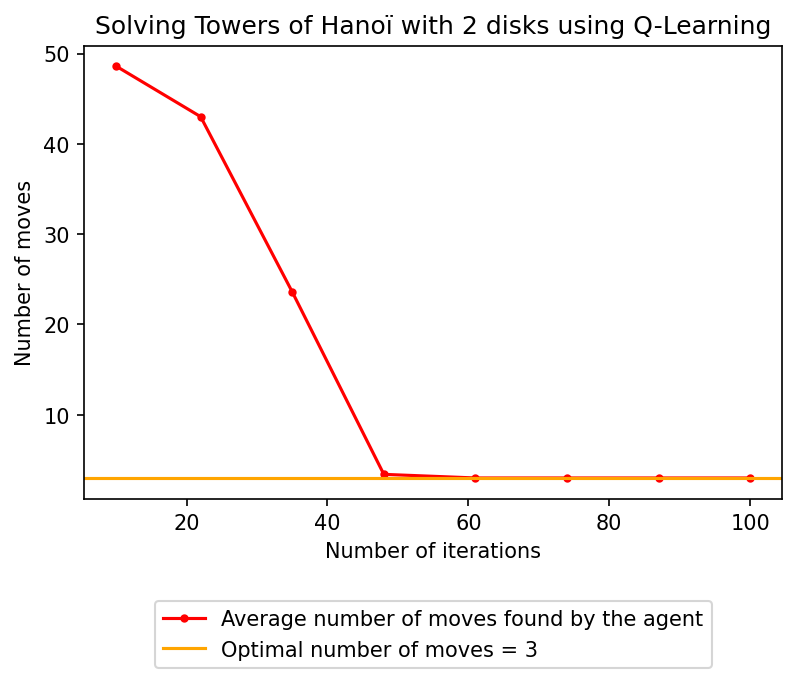

In [6]:
plot_Q_evolution(Hanoi, agent, np.linspace(10, 100, 8, dtype=np.int64))